# Data Visualization and Pre-processing


Dataset URL: https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view


In [1]:
import os
from os import path
from pathlib import Path
from matplotlib import pyplot
from typing import Dict, Tuple

In [2]:
import numpy
import pandas
import seaborn

from pandas import DataFrame
from matplotlib import pyplot

In [3]:
DATASET_PATH: str = path.join(Path(path.abspath("")).parent, "content", "Churn_Modelling.csv")

data: DataFrame = pandas.read_csv(DATASET_PATH)
data.columns = map(lambda x: x.lower(), data.columns)

In [4]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Describing the data
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Checking for missing values in the dataset
data.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

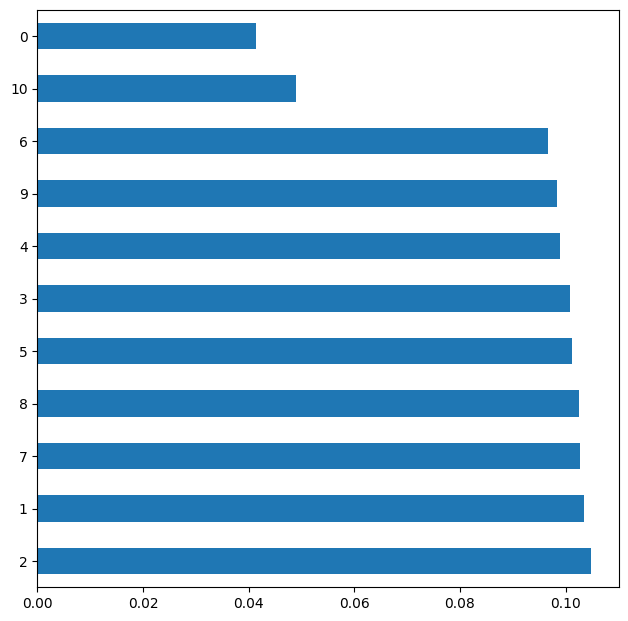

In [7]:
data.tenure.value_counts(normalize=True).plot.barh(figsize=(7.5, 7.5))
pyplot.show()

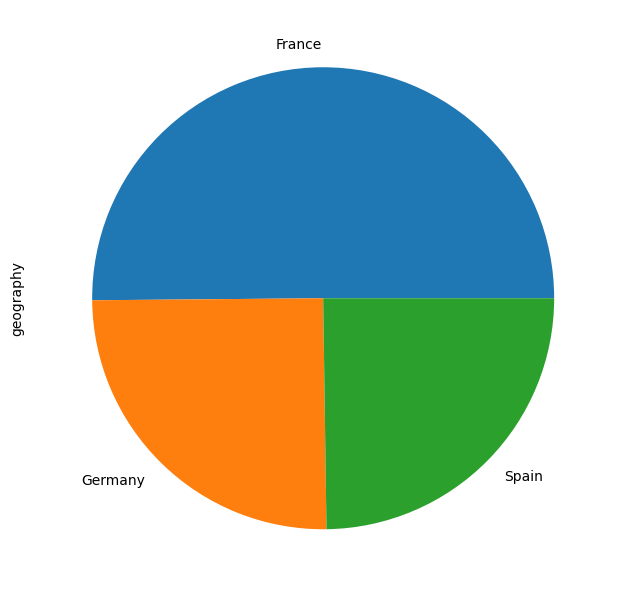

In [8]:
data.geography.value_counts(normalize=True).plot.pie(figsize=(7.5, 7.5))
pyplot.show()

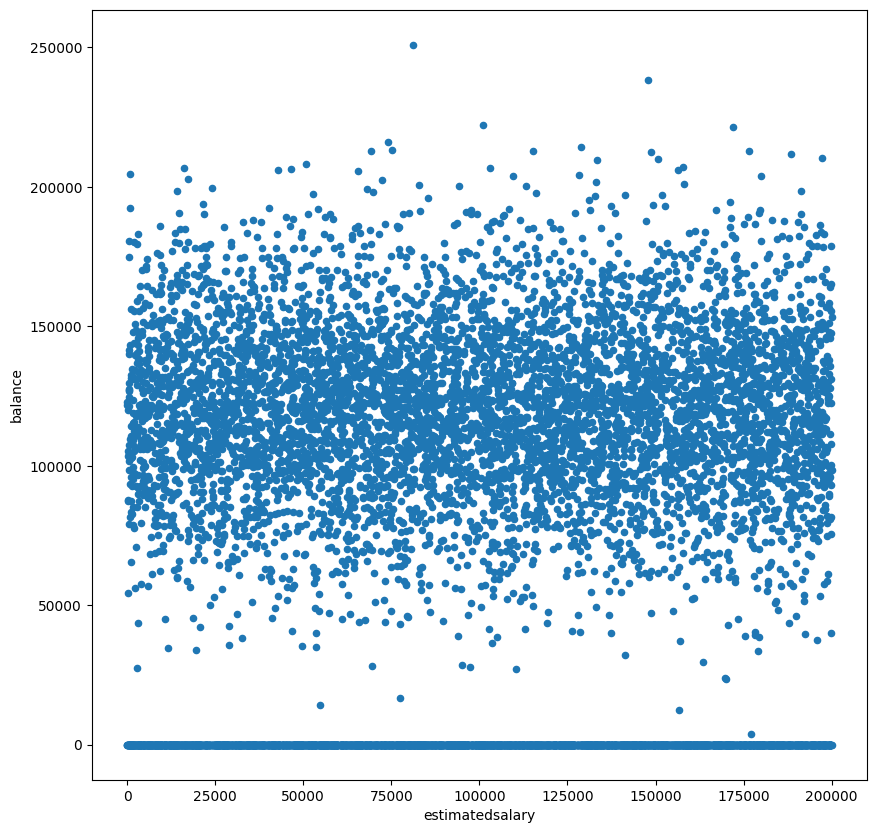

In [9]:
data.plot.scatter(x="estimatedsalary", y="balance", figsize=(10, 10))
pyplot.show()

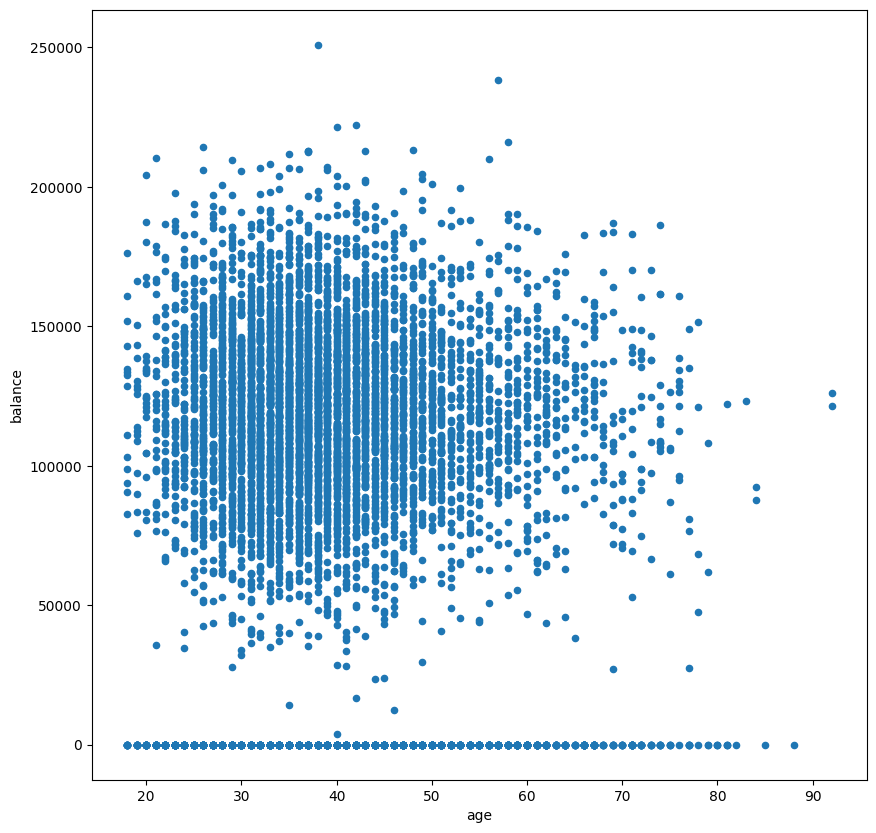

In [10]:
data.plot.scatter(x="age", y="balance", figsize=(10, 10))
pyplot.show()

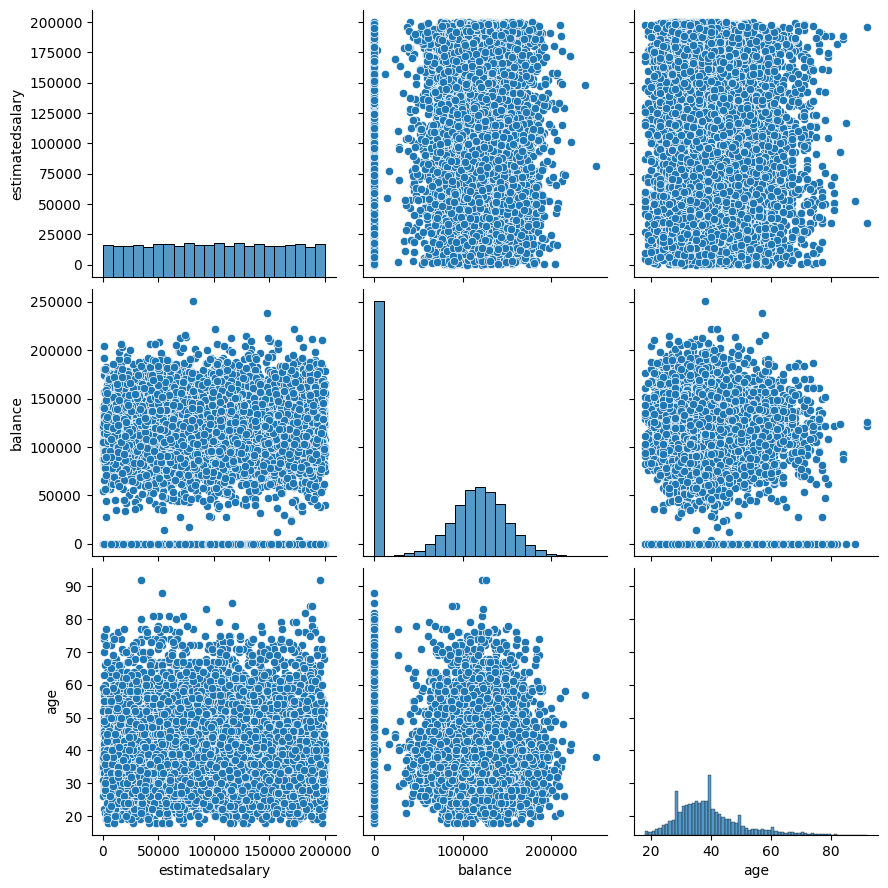

In [11]:
seaborn.pairplot(data = data, vars=["estimatedsalary", "balance", "age"], height=3, aspect=1)
pyplot.show()

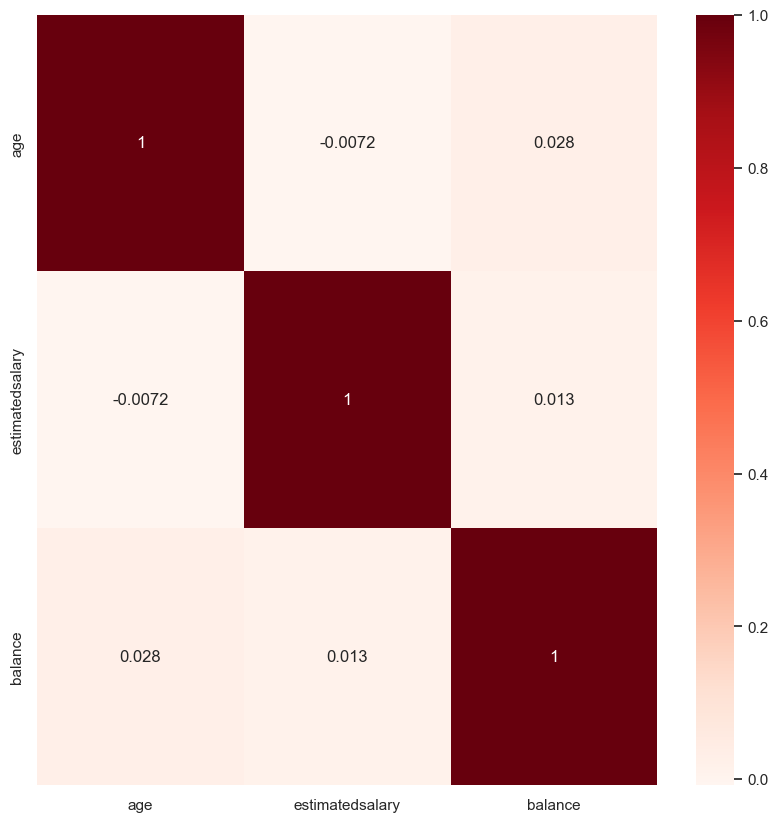

In [16]:
# plot the correlation matrix of salary, balance and age in data dataframe.
seaborn.set(rc = {"figure.figsize":(10, 10)})
seaborn.heatmap(data[["age", "estimatedsalary", "balance"]].corr(), annot=True, cmap="Reds")
pyplot.show()


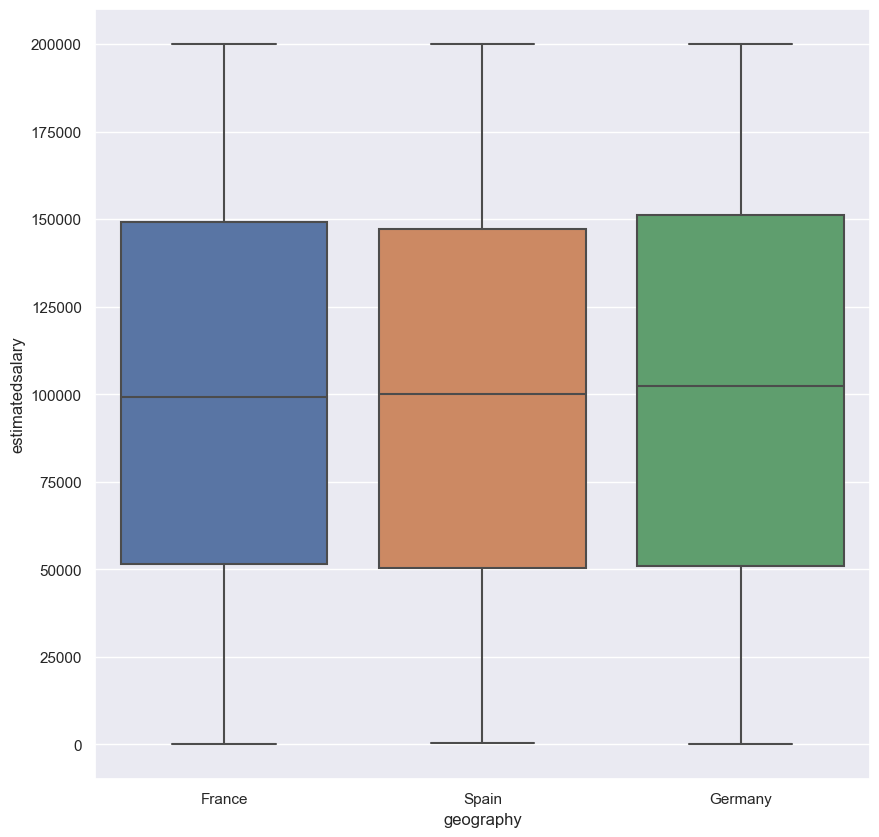

In [17]:
#plot the box plot of salary for yes & no responses.
seaborn.boxplot(x=data.geography, y=data.estimatedsalary)
pyplot.show()

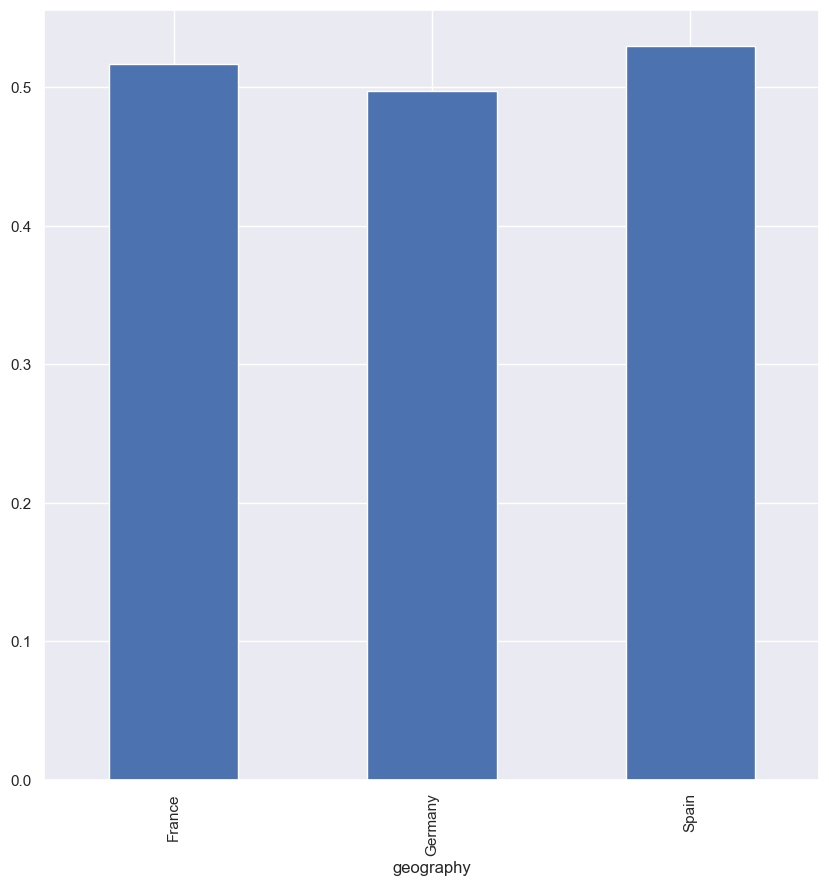

In [18]:
data.groupby('geography')['isactivemember'].mean().plot.bar()
pyplot.show()

tenure                0          1          2          3          4   \
numofproducts                                                          
1              39.550847  39.883803  40.023256  39.257089  39.156746   
2              38.368421  38.624130  38.058932  38.165116  36.939394   
3              48.166667  40.812500  40.000000  43.071429  45.300000   
4                    NaN  50.500000  45.090909  49.125000  37.333333   

tenure                5          6          7          8          9   \
numofproducts                                                          
1              40.115768  39.995918  38.874275  39.297143  40.628000   
2              37.993590  37.502193  37.597510  37.183761  37.345898   
3              44.055556  41.764706  41.583333  43.357143  46.000000   
4              42.000000  42.750000  44.800000  41.250000  50.100000   

tenure                10  
numofproducts             
1              39.576763  
2              38.109649  
3              45.529412  

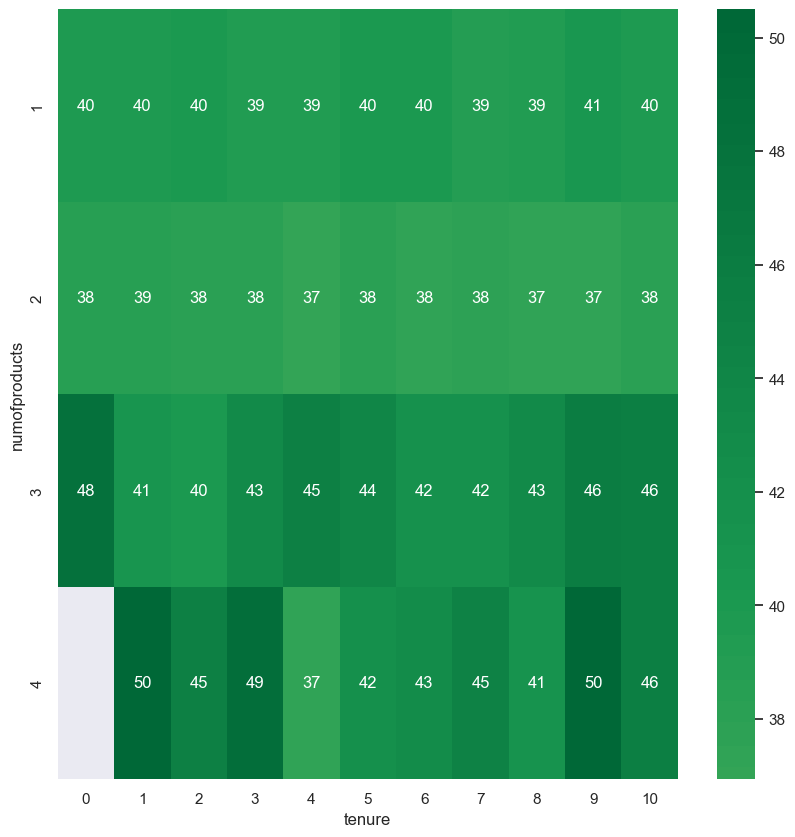

In [30]:
result = pandas.pivot_table(data=data, index='numofproducts', columns='tenure', values='age')
print(result)

#create heat map of education vs marital vs response_rate
seaborn.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
pyplot.show()